# Model Tuning

## Medium zones with guardrails for several versions of the DSSG Equity Tiebreaker

To analyze the effectiveness of the tiebreakers, we are going to compare the performance of individual students in the school assignment process for each method to the base scenario where the policy has no equity tiebreaker. For this analysis, we are considering as __focal__ students those individuals who both are African-American, Latinx, or Pacific Islander (AALPI) and are eligible for free or reduced lunch (FRL).

For this analysis, we are evaluating our classifiers at different points in their respective ROC or Precision and Recall curves. Where we should stand in these curves ultimately depends on the decisions and criteria of the SFUSD. But we hope that this notebook helps illustrating our recommendations.

We are focusing on two alternative tiebreakers or methodologies to benchmark the success: 
- the Naive Classifier at 16% FPR (`naive016`), hereafter referred to as the __Benchmark__ methodology,
- the CTIP1 Classifier.

The several versions of the Equity Tiebreaker (ET) are labelled according to their thresholds:

- ET X% means that the qualification step selects blocks with above X% focal students

```
eligibility_classifier = orClassifier(["Housing", "Redline"], binary_var=[0,1])
propositional_model = andClassifier(["pctBoth"], positive_group=positive_group, eligibility_classifier=eligibility_classifier, frl_key=frl_key)
```

In [10]:
import sys
from collections import OrderedDict
from IPython.core.display import display, HTML
sys.path.append('../')
from src.d06_reporting.simulation_evaluation import SimulationEvaluation

In [11]:
# SimulationEvaluation.get_available_models()

In [12]:
# Definition of focal student to be applied to the student data
def is_focal(row):
    return int(row['FRL'] & row['AALPI'])
# Simulation configuration
policy = 'Medium1'
guard_rails = 0
utility_model = True
num_iterations=20

# Methods to evaluate
method_name_dict = OrderedDict(none='No ET', ctip1='CTIP1', naive016='Benchmark',
                               pc3_010='ET 10%', pc3_020='ET 20%', pc3_030='ET 30%', pc3_035='ET 35%', pc3_040='ET 40%', pc3_050='ET 50%')

se = SimulationEvaluation(method_name_dict=method_name_dict, is_focal=is_focal, figsize=(12, 6))
se.set_simulation_config(equity_tiebreaker_list=list(method_name_dict.keys()),
                         num_iterations=num_iterations,
                         policy=policy,
                         guard_rails=guard_rails,
                         utility_model=utility_model)
# Load the rank data
se.query_rank_df()

,Designation Rate
method,
Benchmark,0.22
CTIP1,0.22
ET 10%,0.21
ET 20%,0.22
ET 30%,0.22
ET 35%,0.22
ET 40%,0.22
ET 50%,0.21
No ET,0.22


status,Extended Positive,False Negative,False Positive,True Negative,True Positive,FPR,TPR
method,,,,,,,
Benchmark,5000.0,10660.0,3520.0,66260.0,10000.0,0.11,0.48
CTIP1,3880.0,13560.0,3300.0,67600.0,7100.0,0.10,0.34
ET 10%,7700.0,10260.0,7900.0,59180.0,10400.0,0.21,0.50
ET 20%,6220.0,10960.0,5940.0,62620.0,9700.0,0.16,0.47
ET 30%,4800.0,11700.0,4100.0,65880.0,8960.0,0.12,0.43
ET 35%,4060.0,12460.0,3580.0,67140.0,8200.0,0.10,0.40
ET 40%,3560.0,13000.0,2780.0,68440.0,7660.0,0.08,0.37
ET 50%,2660.0,14400.0,1920.0,70200.0,6260.0,0.06,0.30
No ET,0.0,20660.0,0.0,74780.0,0.0,0.00,0.00


As a sanity check we can quickly compute the designation rate of each simulated methodology

# General distribution of the tiebreaker and focal students

A first step in analyzing the effects of the different equity tiebreakers is to observe the proportion of students that belong to a focal block and the accuracy of the tiebreaker distribution. The latter refers to the distribution of False Negative (FN), True Negative (TN), True Positive (TP), False Positive (FP), and Extended Positive (EP). The latter term is used to reference the students who are focal if we extend the definition to those students who are either AALPI or FRL, and who get an equity tiebreaker.

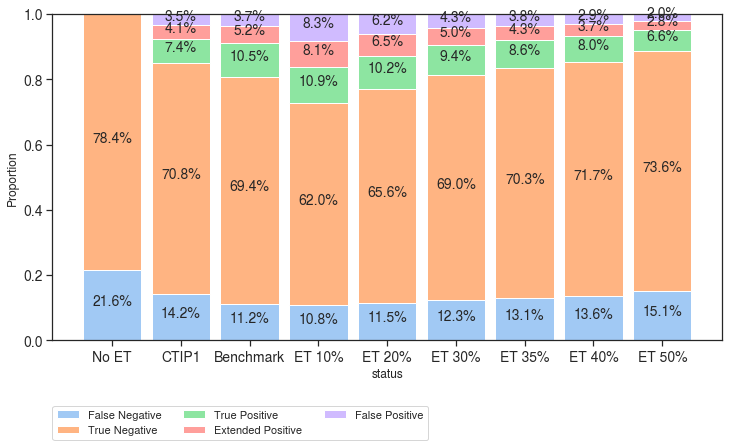

In [13]:
display(HTML("<h3>Figure 1: Student Distribution</h3>"))
se.rank_results_bar_plot()

At this point, it is also good to check the false-positive rate (FPR) and true-positive rate (TPR) of each methodology for the student data. Let's remember that the FPR referenced in the previous section is measured using the aggregated FRL and AALPI block data provided by SFUSD, which is different from the individual student data.

We can see from the first plot that as we increase the threshold the false positive and the true positive rates both decrease. The proportion of students who receive the tiebreaker (TP + FP) decrease at every step since we are having less blocks fitting the qualification criteria.

# Quantifing the effects of the tiebreakers

To analyze the actual effects of each tiebreaker, we have generated two results. First, we look at the average change in rank of the assigned program for each type of student. We compute this change compared to the 'No ET' methodology. We then average the result over the 20 iterations. A positive change means the student is, on average, assigned to a worse-ranked program. The opposite is true for negative changes. 

The plot from Figure 2 shows the distribution of these changes. We also include a table with the mean and standard deviation of the results for each model. The plot from Figure 3 show the same results grouped by focal and not focal students.

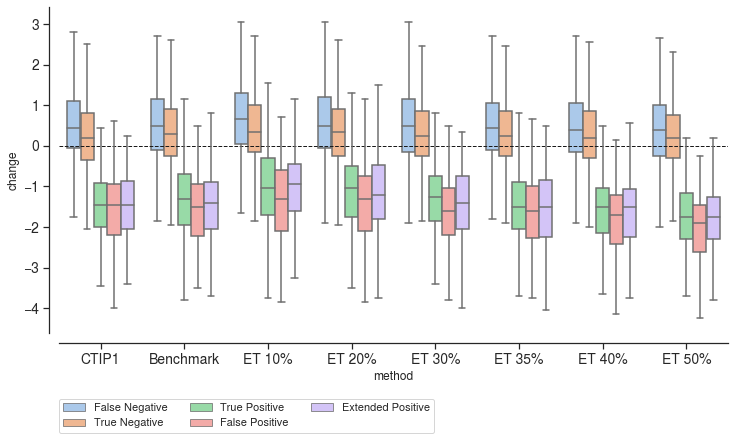

change                                  
                              mean   std   sem lower_95ci upper_95ci
method    status                                                    
Benchmark Extended Positive  -1.47  0.89  0.06      -1.58      -1.36
          False Negative      0.54  0.94  0.04       0.46       0.62
          False Positive     -1.59  0.88  0.07      -1.72      -1.46
          True Negative       0.34  0.88  0.02       0.31       0.37
          True Positive      -1.32  0.85  0.04      -1.40      -1.25
CTIP1     Extended Positive  -1.46  0.85  0.06      -1.58      -1.34
          False Negative      0.50  0.93  0.04       0.43       0.57
          False Positive     -1.56  0.87  0.07      -1.69      -1.43
          True Negative       0.24  0.88  0.02       0.21       0.27
          True Positive      -1.46  0.80  0.04      -1.55      -1.38
ET 10%    Extended Positive  -1.06  0.93  0.05      -1.15      -0.97
          False Negative      0.71  0.96  0.04       0.63       0.79
          False Positive     -1.37  1.03  0.05      -1.47      -1.27
          True Negative       0.42  0.88  0.02       0.39       0.45
          True Positive      -1.04  0.95  0.04      -1.12      -0.96
ET 20%    Extended Positive  -1.18  0.96  0.05      -1.28      -1.07
          False Negative      0.59  1.01  0.04       0.50       0.67
          False Positive     -1.42  1.01  0.06      -1.54      -1.31
          True Negative       0.37  0.90  0.02       0.33       0.40
          True Positive      -1.11  0.88  0.04      -1.19      -1.03
ET 30%    Extended Positive  -1.44  0.92  0.06      -1.56      -1.33
          False Negative      0.53  0.97  0.04       0.45       0.60
          False Positive     -1.63  0.90  0.06      -1.76      -1.51
          True Negative       0.31  0.88  0.02       0.28       0.34
          True Positive      -1.29  0.84  0.04      -1.37      -1.21
ET 35%    Extended Positive  -1.60  0.96  0.07      -1.73      -1.46
          False Negative      0.49  0.90  0.04       0.42       0.56
          False Positive     -1.63  0.88  0.07      -1.76      -1.50
          True Negative       0.29  0.88  0.02       0.26       0.32
          True Positive      -1.49  0.81  0.04      -1.57      -1.41
ET 40%    Extended Positive  -1.64  0.90  0.07      -1.78      -1.51
          False Negative      0.46  0.92  0.04       0.39       0.53
          False Positive     -1.78  0.88  0.07      -1.93      -1.64
          True Negative       0.27  0.87  0.01       0.24       0.30
          True Positive      -1.57  0.82  0.04      -1.66      -1.49
ET 50%    Extended Positive  -1.78  0.91  0.08      -1.94      -1.63
          False Negative      0.40  0.93  0.03       0.33       0.47
          False Positive     -2.05  0.87  0.09      -2.22      -1.87
          True Negative       0.20  0.84  0.01       0.17       0.23
          True Positive      -1.75  0.78  0.04      -1.83      -1.66

In [14]:
display(HTML("<h3>Figure 2: Average change in rank of assigned program grouped by classification status</h3>"))
se.plot_improvement_over_none(hue='status')

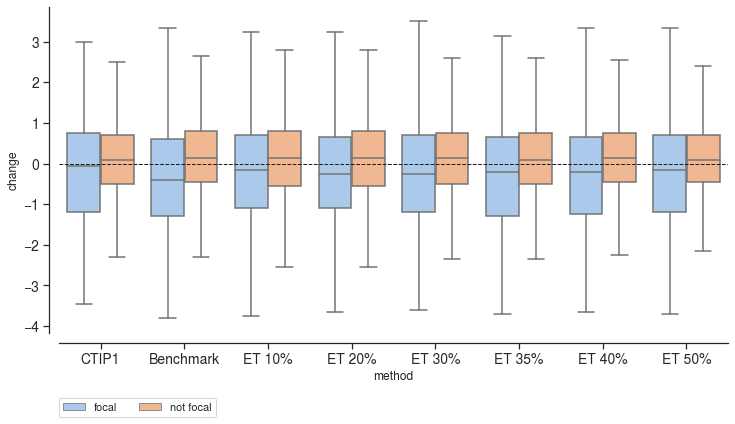

change                                  
                      mean   std   sem lower_95ci upper_95ci
method    focal                                             
Benchmark focal      -0.36  1.29  0.04      -0.44      -0.29
          not focal   0.12  1.06  0.02       0.09       0.16
CTIP1     focal      -0.18  1.29  0.04      -0.25      -0.10
          not focal   0.07  1.02  0.02       0.04       0.11
ET 10%    focal      -0.17  1.29  0.04      -0.25      -0.09
          not focal   0.08  1.12  0.02       0.04       0.11
ET 20%    focal      -0.21  1.27  0.04      -0.29      -0.13
          not focal   0.09  1.10  0.02       0.06       0.13
ET 30%    focal      -0.26  1.28  0.04      -0.34      -0.18
          not focal   0.09  1.07  0.02       0.05       0.12
ET 35%    focal      -0.30  1.30  0.04      -0.37      -0.22
          not focal   0.09  1.05  0.02       0.06       0.13
ET 40%    focal      -0.29  1.32  0.04      -0.37      -0.21
          not focal   0.10  1.03  0.02       0.07       0.13
ET 50%    focal      -0.25  1.33  0.04      -0.33      -0.17
          not focal   0.07  0.98  0.02       0.04       0.11

In [15]:
display(HTML("<h3>Figure 3: Average change in rank of assigned program grouped by student type</h3>"))
se.plot_improvement_over_none(hue='focal')

Figure 2 shows that as we increase the threshold in the tiebreaker the True positives (focal students receiving the tiebreaker) always do better. However, we must notice that this may reflect the fact that less focal students are being awarded the tiebreaker, as discussed in figure 1. The False Negatives also seem to do less worse, which is good and justifies improving the threshold when needed.

From Figure 3, we can see that the effects of the tiebreaker over the overall focal and non-focal students are mixed. Again, this is the main plot we should consider because it takes into account both those who got and those who did not get the tiebreaker. We notice that the improvement now follows a non-monotonic trend: as we increase the threshold past 35% it seems as if the focal students as a group have a lower improvement. This can be justified: at first, too many focal students receive a tiebreaker so they compete against eachother due to the guardrails. However, if too few focal students receive the tiebreaker, the group's improvement is also smaller.

Therefore the plot seems to recommend to keep the threshold between 30 and 40%, approximately around 35%.

It might also be interesting to track the change in average rank of the focal students receiving the equity tiebreaker, i.e., the True Positives. We can do this by comparing these student's average rank of the assigned program with and without the equity tiebreaker. We can determine the latter by looking at the assignments under the 'No ET' methodology.

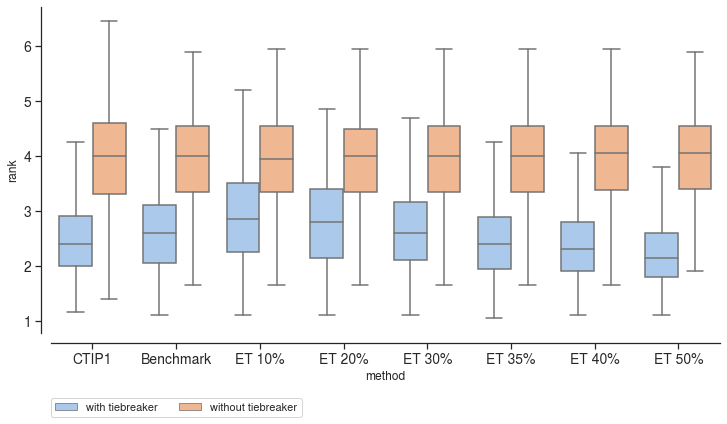

In [16]:
display(HTML("<h3>Figure 4: Distribution of average rank of assigned program for True Positives with and without tiebreakr</h3>"))
se.plot_improvement_tp()

From Figure 4, we can see that most focal students who get the tiebreaker get assigned to one of their top three ranked programs. Analysis is similar to that of Figure 2: although they are consistently doing better as we improve the threshold, there is a trade-off because there are more false negatives for higher thresholds. 

Finally, in Figure 5, we plot the proportion of each type of student getting their top three choices. Here we can see that the proportion also peaks between 30% and 40%, where we find that 62% of the focal students get into one of their top choices.

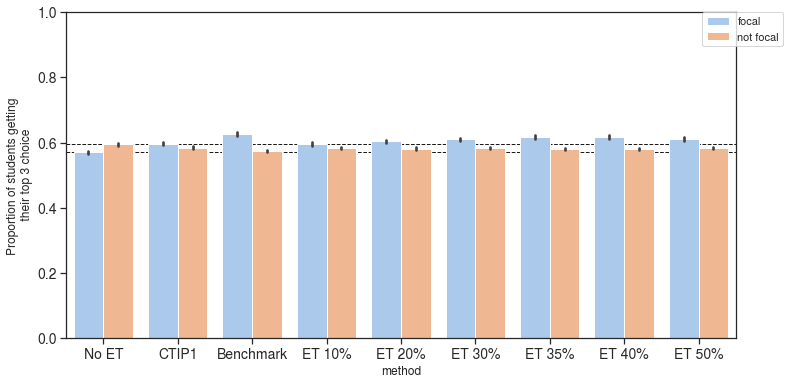

rank                                 
                     mean   std  sem lower_95ci upper_95ci
method    focal                                           
Benchmark focal      0.63  0.01  0.0       0.62       0.63
          not focal  0.57  0.01  0.0       0.57       0.58
CTIP1     focal      0.60  0.01  0.0       0.59       0.60
          not focal  0.58  0.01  0.0       0.58       0.59
ET 10%    focal      0.60  0.01  0.0       0.59       0.60
          not focal  0.58  0.01  0.0       0.58       0.59
ET 20%    focal      0.60  0.01  0.0       0.60       0.61
          not focal  0.58  0.01  0.0       0.58       0.59
ET 30%    focal      0.61  0.01  0.0       0.60       0.62
          not focal  0.58  0.01  0.0       0.58       0.59
ET 35%    focal      0.62  0.01  0.0       0.61       0.62
          not focal  0.58  0.01  0.0       0.58       0.59
ET 40%    focal      0.62  0.01  0.0       0.61       0.62
          not focal  0.58  0.01  0.0       0.58       0.58
ET 50%    focal      0.61  0.01  0.0       0.61       0.62
          not focal  0.58  0.01  0.0       0.58       0.59
No ET     focal      0.57  0.01  0.0       0.57       0.57
          not focal  0.59  0.01  0.0       0.59       0.60

In [17]:
display(HTML("<h3>Figure 5: Proportion of students getting one of their top 3 choice</h3>"))
se.topkrank()

# Conclusions:

- When considering as focal AALPI and FRL (intersection), using the qualification threshold in the interval from 30 to 40% is ideal.
